In [1]:
import torch

In [2]:
import torch.nn as nn

class Clarity(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Clarity, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
    

In [3]:
print(torch.cuda.is_available())

True


In [4]:
from roaddetection_angular import get_lines_from_frame



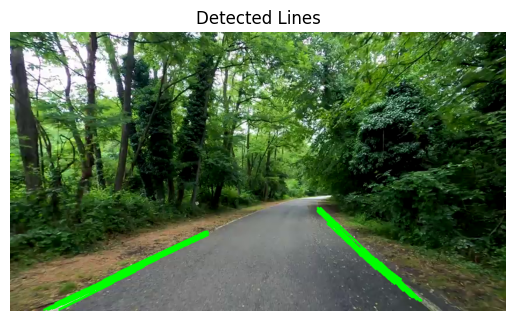

In [6]:
import cv2
import matplotlib.pyplot as plt

# Open the video file
video_path = r'../data/road.mp4'
cap = cv2.VideoCapture(video_path)

# Read the first frame
ret, frame = cap.read()

if ret:
    # Process the frame using get_lines_from_frame
    lines, p_lines, intersection_point = get_lines_from_frame(frame)
    scale_factor = (frame.shape[1] * frame.shape[0] / 360) / frame.shape[1]

    # Visualize the frame and the detected lines
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Rescale the coordinates to the original size
        scale_x = scale_factor
        scale_y = frame.shape[0] / 360
        x1 = int(line[0][0] * scale_x)
        y1 = int(line[0][1] * scale_y)
        x2 = int(line[0][2] * scale_x)
        y2 = int(line[0][3] * scale_y)
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Convert BGR to RGB for visualization
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame
    plt.imshow(frame_rgb)
    plt.title("Detected Lines")
    plt.axis("off")
    plt.show()
else:
    print("Failed to read the video file.")

cap.release()